---
---
# *Project on Machine Learning*
---
---

# 1. Your views about the problem statement?
   ## Answer:-
   * We have been given a task to predict the salary of a new employee based on the previous data that we have.
   * This is a regression problem because the target/dependable variable (salary) is a continuous variable.
   * We have some past data in the form of Excel sheets. We will perform regression analysis on this data and try to build a machine learning model which would predict the salary of new employees.

---
# 2. What will be your approach to solving this task?
## Answer:-
**Steps:**
 #### Data Exploration:
    1.  Load the Data
    2. Check for the missing values, data types, and null values.
    3. Visualize the data using appropriate graphs.

   #### Data Preprocessing:
    1.  Handle missing values appropriately - Either delete the values or replace it with the numerical values with the mean of total.
    2.  Convert categorical variables into numerical representations.
    3.  Identify Outliers and treat the Outliers.
    4.  Normalize or standardize numerical features if necessary.

   ####  Model Selection and Training:
    >   Split the data into training and testing sets. (Train - Test ratio -  80:20 )
    >   Train multiple regression models example :
                *    Linear Regression
                *    Decision tree Regressor
                *    XGBoost
                *    Random Forest Regressor
                *    Ridge Regression
                *    Gradient Boosting Machine Regressor
                *    Lasso Regression

   ####  Model Evaluation

         > Evaluate the results of above mentioned models by looking at the parameters like :
            Mean Squared Error (MSE).
            R - Squared Value.

   ####  Predictive Analysis:

          1. Use the trained model to predict salaries for new employees.
          2. Validate the models predictions with appropriate statistical methods.  

   #### Draw Conclusion
              > Draw the conclusion of the all the statistical models and document the results.  
  

---
# 3. What were the available ML model options you had to perform this task?
## Answer:-
 These were the following regression models that i've used to perform this task, that are as follows:

1.   Linear Regression
2.   Decision tree Regressor
3.   XGBoost
4.   Random Forest Regressor
5.   Ridge Regression
6.   Gradient Boosting Machine Regressor
7.   Lasso Regression





# 4. Which model’s performance is best and what could be the possible reason for that?
* Out of all the models evaluated **"Random Forest"** had the best results:-
          > To detect the best model we can check the R-Square value of the models.
          > Maximum R square value shows the best fit of the model

           * So the best Model is Random Forest Regression , having R2_score : 0.6618027689999071

* It performed better than others because it can capture nonlinear relationships in the data without the need for explicit feature engineering or transformations. Since our data is non-linear Random forest performed better.
* It is also a common observation that Random forests are more accurate than most non-linear regressors as they combine the results of multiple trees, making them flexible and accurate.
* They also work well with categorical variables. We had few categorical variables in our data.

# 5. What steps can you take to improve this selected model’s performance even further?
The following steps can be taken :

   * Use of more advanced method like Ensemble Method.
   * Implement k-fold cross-validation to ensure the model's robustness and reduce overfitting.
   * Gathering adquate data -  "get more diverse sample size".
   * Apart from testing multiple variables at a time , we can also check the impact of individual independent vairables on the dependent one.
   * Fine-tuning model hyperparameters ensures optimal performance.

# Loading the Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

# Importing of Data

In [ ]:

from google.colab import files
uploaded = files.upload()


Saving ML case Study.csv to ML case Study (1).csv
Saving cities.csv to cities (1).csv
Saving Colleges.csv to Colleges (1).csv


In [ ]:
df = pd.read_csv('ML case Study.csv' , header = 0) # reading the data
df_colg = pd.read_csv ('Colleges.csv', header = 0) # reading college data
df_cities = pd.read_csv('cities.csv', header= 0 )  # reading city data

## Note:-
* df_colg is the DataFrame for "colleges.csv"
* df_cities is the DataFrame for "cities.csv"

In [ ]:
# Let's see how our data looks like
df.head()  # printing first 5 rows

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [ ]:
df_colg.head()  # printing first 5 rows

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [ ]:
df_cities.head()  # printing first 5 rows

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


# **Preprocessing of the Data**

### *Listing Colleges as Tier1,2, & 3*
* Having 2-3 categories would make much more sense than a list of names.
* Hence categorising colleges into 3 categories (**Tier1**, **Tier2**, **Tier3**) based on college data.
* And cities into 2 categories (**Metro**, **Non-Metro**) based on city data.

In [ ]:
Tier1 = df_colg["Tier 1"].tolist()
Tier2 = df_colg["Tier 2"].tolist()
Tier3 = df_colg["Tier 3"].tolist()

In [ ]:
# Removing Nan Values using list comprehension
Tier1 = [x for x in Tier1 if str(x) != "nan"]

In [ ]:
# Removing Nan Values using list comprehension
Tier3 = [x for x in Tier3 if str(x) != "nan"]

In [ ]:
# It assigns a numeric code to each college depending on whether it belongs to the Tier1, Tier2, or Tier3 lists.
for item in df.College:
    if item in Tier1:
        df["College"].replace(item,1,inplace = True)
    elif item in Tier2:
        df["College"].replace(item,2,inplace = True)
    elif item in Tier3:
        df["College"].replace(item,3,inplace = True)

In [ ]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,Asansol,Manager,55523.0,3,66,19,71406.58
1,2,Ajmer,Executive,57081.0,1,84,18,68005.87
2,3,Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,3,Ajmer,Executive,49010.0,2,81,33,82092.39
4,1,Durgapur,Executive,57879.0,4,74,32,73878.10


# *Listing of Cities (Metro/Non metro)*

In [ ]:
metro = df_cities["Metrio City"].tolist()

In [ ]:
non_metro = df_cities["non-metro cities"].tolist()

In [ ]:
# Removing Nan Values using list comprehension
Non_Metro = [x for x in Non_Metro if str(x) != "nan"]

In [ ]:
# Its purpose is to categorize cities into binary values based on whether they are part of the metro or non_metro categories.
for city in df.City:
    if city in metro:
        df["City"].replace(city,1,inplace = True)
    elif city in non_metro:
        df["City"].replace(city,0,inplace = True)

In [ ]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523.0,3,66,19,71406.58
1,2,0,Executive,57081.0,1,84,18,68005.87
2,3,0,Executive,60347.0,2,52,28,76764.02
3,3,0,Executive,49010.0,2,81,33,82092.39
4,1,0,Executive,57879.0,4,74,32,73878.10


*Now we will assign Numerical Varaibles to the Cities which is catregorical in Nature*

In [ ]:
df = pd.get_dummies(df)
df=df.astype(int)

In [ ]:
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Executive,Role_Manager
0,2,0,55523,3,66,19,71406,0,1
1,2,0,57081,1,84,18,68005,1,0
2,3,0,60347,2,52,28,76764,1,0
3,3,0,49010,2,81,33,82092,1,0
4,1,0,57879,4,74,32,73878,1,0


Missing Values Checking

In [ ]:
missing_values = df.isnull()
total_missing = missing_values.sum().sum()

if total_missing == 0:
    print("No missing values detected")
else:
    print("Missing values detected")
    print("\nTotal Missing values:\n", missing_values.sum())

No missing values detected


No missing Values Detected

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   College              1589 non-null   int64
 1   City                 1589 non-null   int64
 2   Previous CTC         1589 non-null   int64
 3   Previous job change  1589 non-null   int64
 4   Graduation Marks     1589 non-null   int64
 5   EXP (Month)          1589 non-null   int64
 6   CTC                  1589 non-null   int64
 7   Role_Executive       1589 non-null   int64
 8   Role_Manager         1589 non-null   int64
dtypes: int64(9)
memory usage: 111.9 KB


As we can check in the 'info' there is no missing values as well.

# Outliers Detection

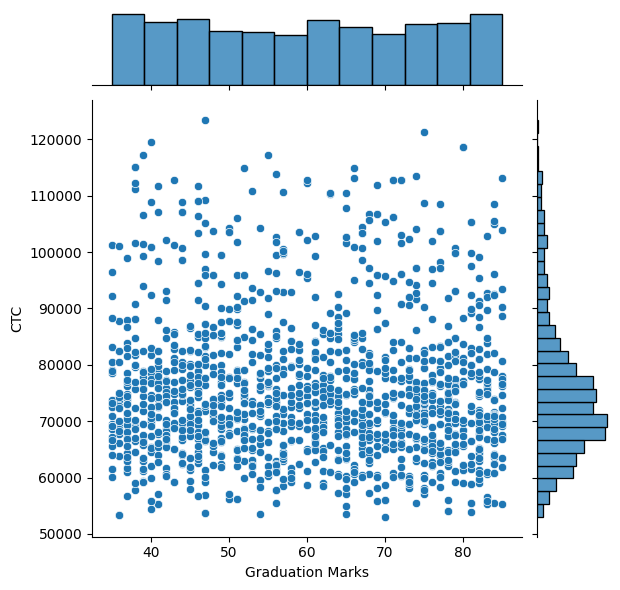

In [ ]:
sns.jointplot(x = "Graduation Marks",y = "CTC",data = df)

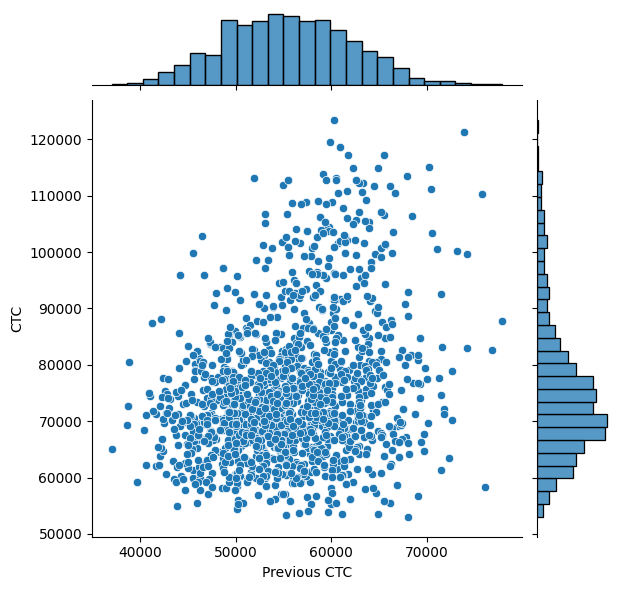

In [ ]:
sns.jointplot(x = "Previous CTC",y = "CTC",data = df)

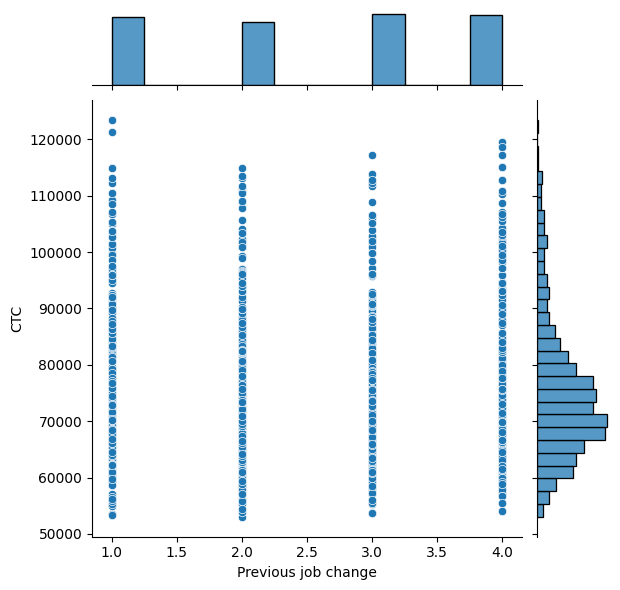

In [ ]:
sns.jointplot(x = "Previous job change",y = "CTC",data = df)

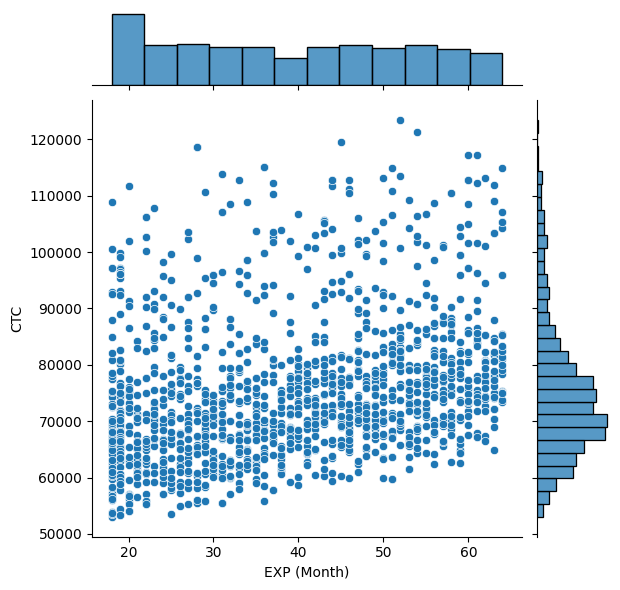

In [ ]:
sns.jointplot(x = "EXP (Month)",y = "CTC",data = df)

Hence, we have no outliers in the above data we have checked that can impact our model

# * *ML Model Designing*  



After Preprocessing the data we are going to work on Model Designing

## **Model 1- Multiple Linear Regression**

We can only perform Regression because as we can see the valriable is 'Continous' it is not 'Discrete' or 'Categorical'
so by using Statsmodels:

In [ ]:
import statsmodels.api as sn

In [ ]:
X_multi = df.loc[:, df.columns !="CTC"]

In [ ]:
y_multi = df['CTC']

In [ ]:
X_multi_cons = sn.add_constant(X_multi)

In [ ]:
X_multi.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Executive,Role_Manager
0,2,0,55523,3,66,19,0,1
1,2,0,57081,1,84,18,1,0
2,3,0,60347,2,52,28,1,0
3,3,0,49010,2,81,33,1,0
4,1,0,57879,4,74,32,1,0


In [ ]:
lm_multi  = sn.OLS(y_multi, X_multi_cons).fit()

In [ ]:
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     259.1
Date:                Sun, 29 Sep 2024   Prob (F-statistic):          4.71e-257
Time:                        17:22:18   Log-Likelihood:                -16648.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1581   BIC:                         3.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.211e+04   1463.782     21.936      0.000    2.92e+04     3.5e+04
College              -481.5171    258.382     -1.864      0.063    -988.324      25.290
City                  380.8471    433.456      0.879      0.380    -469.362    1231.056
Previous CTC            0.4101      0.033     12.526      0.000       0.346       0.474
Previous job change   126.5629    192.887      0.656      0.512    -251.779     504.905
Graduation Marks        6.2366     14.502      0.430      0.667     -22.208      34.681
EXP (Month)           261.3459     15.460     16.904      0.000     231.021     291.671
Role_Executive       6311.1041    760.862      8.295      0.000    4818.699    7803.509
Role_Manager          2.58e+04    797.099     32.365      0.000    2.42e+04    2.74e+04
==============================================================================
Omnibus:                       49.727   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.300
Skew:                           0.408   Prob(JB):                     9.81e-13
Kurtosis:                       3.411   Cond. No.                     2.31e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.32e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm_multi_lr = LinearRegression()

In [ ]:
lm_multi_lr.fit(X_multi, y_multi)

LinearRegression()

Hence, The model has been fitted with multiple regression.

In [ ]:
print ("The Intercept is:",(lm_multi_lr.intercept_))

The Intercept is: 48164.42864124445


In [ ]:
print ("The Coefficient is:",(lm_multi_lr.coef_))

The Coefficient is: [-4.81517095e+02  3.80847147e+02  4.10087094e-01  1.26562908e+02
  6.23658369e+00  2.61345898e+02 -9.74370550e+03  9.74370550e+03]


In [ ]:
y_pred = lm_multi_lr.predict(X_multi)

In [ ]:
print ("Predicted value of y is :",y_pred)

Predicted value of y is : [85471.24094881 66220.53244111 69618.81100318 ... 62202.16429636
 67535.88758095 81066.19861607]


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse = mean_squared_error(y_multi,y_pred)

In [ ]:
print ("Mean Squared Error is:", mse)

Mean Squared Error is: 73736682.98816136


In [ ]:
r2 = r2_score(y_multi,y_pred)

In [ ]:
print ("R-squared value--- ",(r2))

R-squared value---  0.5343149817967605


## **Model 2: Decision Tree Regressor**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.loc[:,df.columns!="CTC"]

In [ ]:
y = df["CTC"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

Splitting the Train - Test Data in 80:20 Ratio


In [ ]:
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(1271, 8) (318, 8) (1271,) (318,)


In [ ]:
from sklearn import tree
from IPython.display import Image

In [ ]:
regtree = tree.DecisionTreeRegressor(max_depth = 3)

In [ ]:
regtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [ ]:
y_train_pred = regtree.predict(X_train)
y_test_pred = regtree.predict(X_test)

In [ ]:
mse_dt = mean_squared_error(y_test, y_test_pred)
r2_dt = r2_score(y_test, y_test_pred)

In [ ]:
print("Mean Squared Error - ",mse_dt)

Mean Squared Error -  60424955.67874997


In [ ]:
print("R squared value- ",r2_dt)

R squared value-  0.5927814236522648


In [ ]:
import pydotplus

In [ ]:
dot_data = tree.export_graphviz(regtree, out_file=None,feature_names= X_train.columns, filled = True)

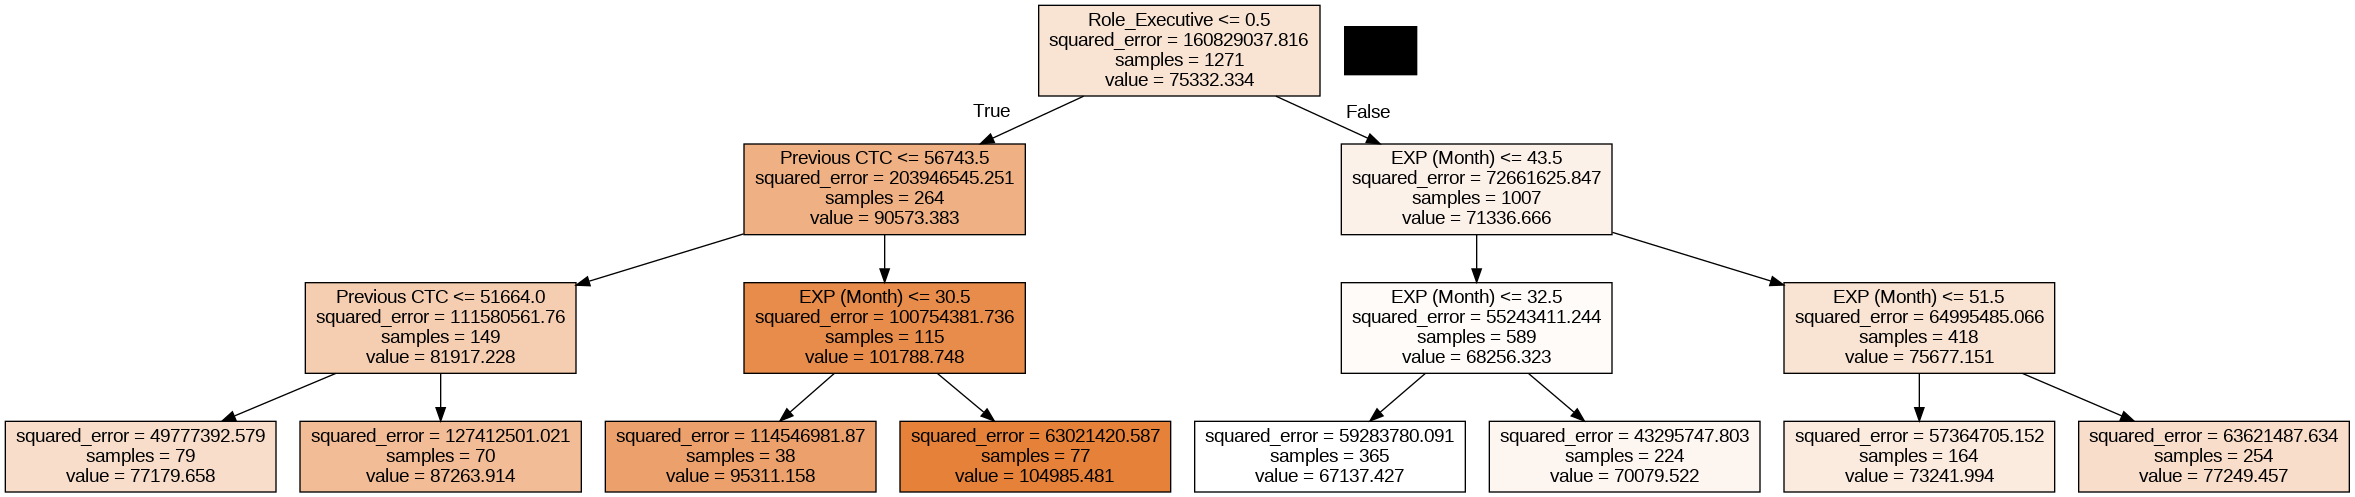

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## **Model 3: XG Boost Regressor**

In [ ]:
from xgboost import XGBRegressor

In [ ]:
m5 = XGBRegressor(n_estimators = 250, max_depth = 5, learning_rate = 0.1)

In [ ]:
m5.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=250, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred_xg = m5.predict(X_test)

In [ ]:
mse_xg = mean_squared_error(y_test, pred_xg)
r2_xg = r2_score(y_test, pred_xg)

In [ ]:
print("Mean Squared Error - ",mse_xg)

Mean Squared Error -  55072601.552068606


In [ ]:
print(" R squared value",r2_xg)

 R squared value 0.6288522481918335


## **Model 4: Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(n_estimators=250, random_state=42)

In [ ]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=250, random_state=42)

In [ ]:
pred_rf = rf.predict(X_test)

In [ ]:
mse_rf = mean_squared_error(y_test, pred_rf)
r2_rf = r2_score(y_test, pred_rf)

In [ ]:
print("Mean Squared Error - ",mse_rf)

Mean Squared Error -  50183252.63336242


In [ ]:
print("R squared value  - ",r2_rf)

R squared value  -  0.6618027689999071


## **Model 5: Ridge Regression**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train_s = scaler.transform(X_train)

In [ ]:
X_test_s = scaler.transform(X_test)

In [ ]:
lm_rr = Ridge(alpha = 0.5)

In [ ]:
lm_rr.fit(X_train_s,y_train)

Ridge(alpha=0.5)

In [ ]:
y_pred = lm_rr.predict(X_test_s)

In [ ]:
mse_rr = mean_squared_error(y_test, y_pred)
r2_rr = r2_score(y_test, y_pred)

In [ ]:
print("Mean Squared Error - ",mse_rr)

Mean Squared Error -  68910704.9246653


In [ ]:
print(" R squared value ",r2_rr)

 R squared value  0.5355938810492216


Changing HyperParameters

In [ ]:
from sklearn.model_selection import validation_curve

In [ ]:
param_range = np.logspace(-2,8,100)

In [ ]:
train_scores, test_scores = validation_curve(
  Ridge(),
  X_train_s,
  y_train,
  param_name ="alpha",
  param_range = param_range,
  scoring = "r2"
)

In [ ]:
train_mean = np.mean(train_scores, axis = 1)

In [ ]:
test_mean = np.mean(test_scores, axis = 1)

In [ ]:
max(test_mean)

0.5258378890157408

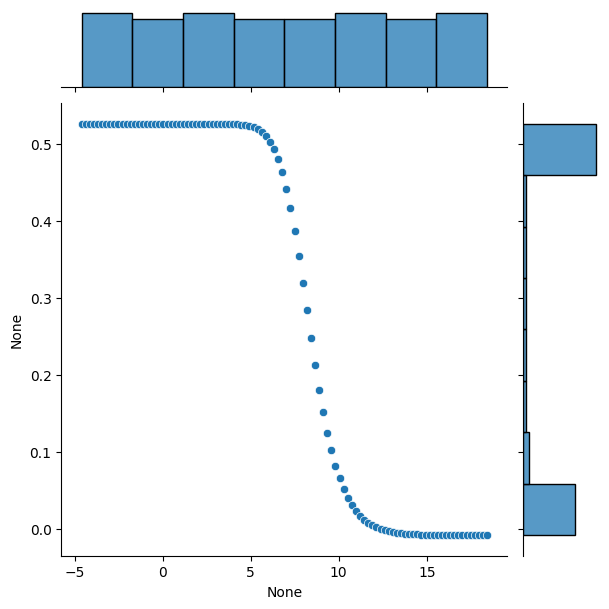

In [ ]:
sns.jointplot(x=np.log(param_range),y = test_mean)

In [ ]:
np.where(test_mean == max(test_mean))

(array([30]),)

In [ ]:
param_range[30]

10.722672220103231

In [ ]:
lm_r_best = Ridge(alpha = param_range[30])

In [ ]:
lm_r_best.fit(X_train_s,y_train)

Ridge(alpha=10.722672220103231)

In [ ]:
y_pred_best = lm_r_best.predict(X_test_s)


In [ ]:
print (y_pred_best)

[69258.7253841  64437.39618785 63393.96955214 72179.61516308
 76821.24420619 88871.29195567 69421.3281213  71557.11767764
 71135.90263223 73779.22421272 71878.86578107 78182.66691376
 85562.74804718 78232.40918879 77232.85945785 93569.13300085
 66049.74757018 68688.04428797 66902.89732616 81384.67206583
 91299.8584835  96148.87431391 71364.76330189 67666.98048386
 72754.54333432 67913.1570051  73771.82955208 94111.92420452
 72292.62928157 74547.4738125  68612.59209568 69588.77192926
 85109.95370629 80137.41831542 98274.64154142 79923.57364634
 71519.90463345 80937.31877532 73628.90480484 65972.86518585
 71632.60023554 88027.2199492  73182.99123826 68024.7884939
 75102.34045104 78341.40966115 86637.99488813 67821.05746964
 69633.14414361 76777.69007693 90289.82555791 69933.89909224
 91689.8187075  72756.97715639 89996.32410394 69626.10498863
 68079.25814117 89282.68277823 68969.58957152 69690.92834781
 74504.12061732 74205.78675182 70188.09325772 68642.8917069
 63588.37651478 74942.4367

In [ ]:
mse_rr1 = mean_squared_error(y_test, y_pred_best)

In [ ]:
r2_rr1 = r2_score(y_test,y_pred_best)

In [ ]:
print (" MSE is :",mse_rr1)

 MSE is : 68923563.2908269


In [ ]:
print (" The R squared value is :",r2_rr1)

 The R squared value is : 0.5355072253702282


## **Model 6: Gradient Boosting Machine Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model = GradientBoostingRegressor(n_estimators = 250, learning_rate = 0.1, max_depth = 4, random_state = 42)

In [ ]:
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=250, random_state=42)

In [ ]:
pred_gb = model.predict(X_test)

In [ ]:
mse_gb = mean_squared_error(y_test, pred_gb)
r2_gb = r2_score(y_test,pred_gb)

In [ ]:
print("Mean Squared Error - ",mse_gb)

Mean Squared Error -  54039363.0215319


In [ ]:
print("R squared value - ",r2_gb)

R squared value -  0.6358154966077103


## **Model 7: Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lm_lasso = Lasso(alpha = 0.5)

In [ ]:
lm_lasso.fit(X_train_s,y_train)

Lasso(alpha=0.5)

In [ ]:
y_pred_lasso = lm_lasso.predict(X_test_s)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("Mean Squared Error - ", mse_lasso)
print("R squared value - ", r2_lasso)


Mean Squared Error -  68909196.57193513
R squared value -  0.5356040462077147


*Changing Hyper Parameters*

In [ ]:
from sklearn.model_selection import validation_curve

In [ ]:
param_range = np.logspace(-2,8,100)

In [ ]:
train_scores, test_scores = validation_curve(
  Lasso(),
  X_train_s,
  y_train,
  param_name ="alpha",
  param_range = param_range,
  scoring = "r2"
)

In [ ]:
train_mean = np.mean(train_scores, axis = 1)

In [ ]:
test_mean = np.mean(test_scores, axis = 1)

In [ ]:
max(test_mean)

0.525833050754811

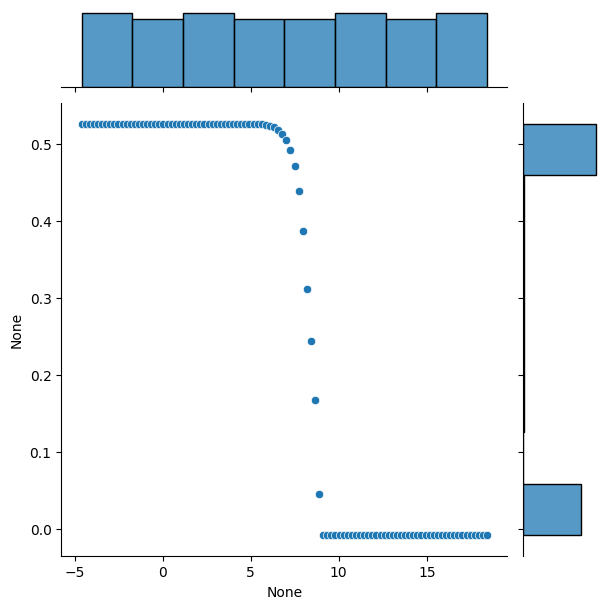

In [ ]:
sns.jointplot(x=np.log(param_range),y = test_mean)

In [ ]:
np.where(test_mean == max(test_mean))

(array([36]),)

In [ ]:
param_range[36]

43.28761281083057

In [ ]:
lm_lasso_best = Lasso(alpha = param_range[36])

In [ ]:
lm_lasso_best.fit(X_train_s,y_train)

Lasso(alpha=43.28761281083057)

In [ ]:
_pred_lasso_best = lm_lasso_best.predict(X_test_s)


In [ ]:
r2_score(y_test,y_pred_best)

0.5355072253702282


#          *R Square Value of Different Models*
---



###  *Multiple Linear Regression* :      0.5356040462077147   
                               

###   *Decision Tree*             :      0.5927814236522648


###  *XGBoost Regressor*         :      0.5927831611924911  
                                 

###   *Random Forest Regressor*   :      0.6618027689999071


###  *Ridge Regression*           :      0.5356040462077147


### *Gradient Boosting*          :      0.6358154966077103
                                  

###  *Lasso Regression*           :      0.5356040462077147
                                  



---



---

# Thankyou so much Internshala for this Amazing Project.

---



---

